In [496]:
import requests
import json
import numpy as np
import math
import time
import pandas as pd
import nltk
from matplotlib import pyplot as plt

import matplotlib
matplotlib.rcParams.update({'font.size': 18})

import wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

In [285]:
%run wordart.py

In [483]:
reader = NYTReader()
reader.getSearchTerm('headline:("California")', 100)

In [484]:
#reader_control = NYTReader()
#reader_control.getSearchTerm('headline:("Obama")', 100)    

In [485]:
len(reader.docs), len(reader_control.docs)

(110, 110)

In [486]:
def df_from_text(text):
    corpus = ' '.join(text)
    text = nltk.word_tokenize(corpus)
    poses = nltk.pos_tag(text)
    df = pd.DataFrame({'word': text, 'tuple': poses, 'pos': [x[1] for x in poses], 'count':1})
    return df[df['word'].str.isalpha()]

In [487]:
def plot_top_words(df, title, pos_list=None, exclude=False, print_tuple=False):
    
    if print_tuple:
        to_group='tuple'
    else:
        to_group='word'
    
    fig,ax = plt.subplots(figsize=(15,5))    
    
    if pos_list is None:
        df.groupby(to_group).count()['count']\
            .sort_values(ascending=False)[0:25].plot.bar(ax=ax, color='C0')
    elif exclude==False:
        df[df['pos'].isin(pos_list)].groupby(to_group).count()['count']\
            .sort_values(ascending=False)[0:25].plot.bar(ax=ax, color='C0')
    elif exclude==True:
        df[~df['pos'].isin(pos_list)].groupby(to_group).count()['count']\
            .sort_values(ascending=False)[0:25].plot.bar(ax=ax, color='C0')
        
    plt.title(title)
    plt.show()

In [490]:
pos_list = [
    #'NN',
    #'NNS'
    'NNP', 
    'NNPS',
    #'JJ',
    #'JJR',
    #'JJS',
    ]
pos_exclude_list = [
    'IN',
    'TO',
    'DT',
    'CC',
]

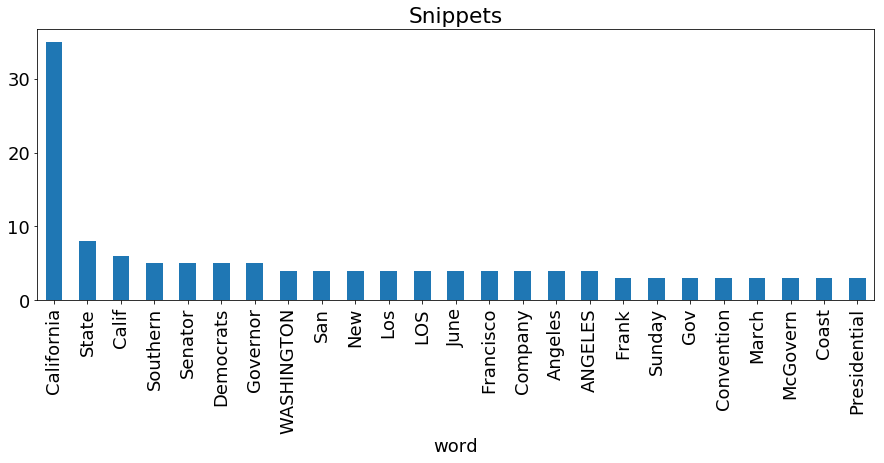

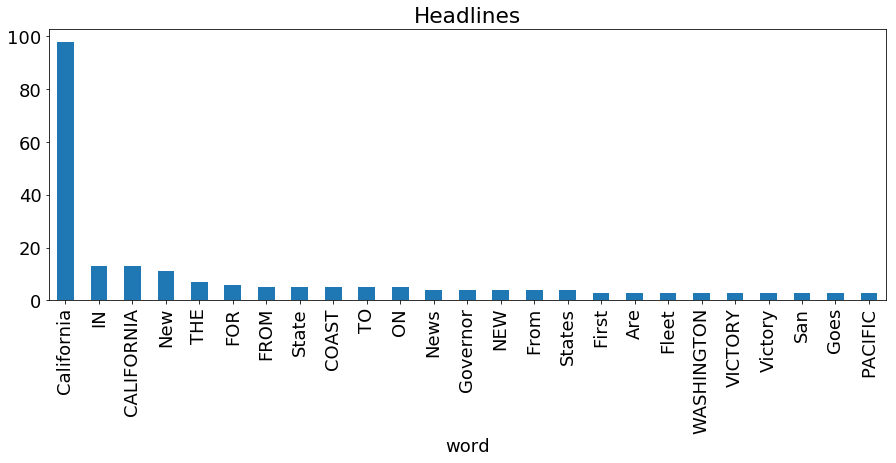

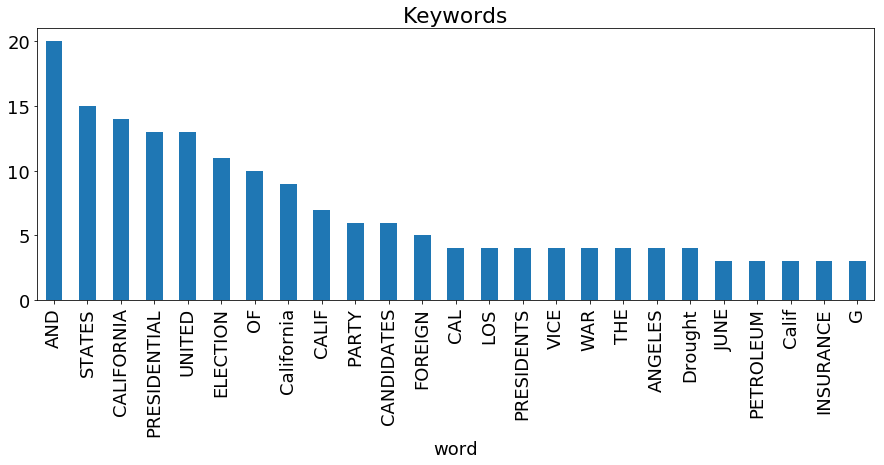

In [491]:
# Testing different types of sources

pos = pos_list
exclude = False
print_tuple = False

plot_top_words(df_from_text(reader.snippets), "Snippets", pos, exclude=exclude, print_tuple=print_tuple)
plot_top_words(df_from_text(reader.headlines), "Headlines", pos, exclude=exclude, print_tuple=print_tuple)
plot_top_words(df_from_text(reader.keywords), "Keywords", pos, exclude=exclude, print_tuple=print_tuple)

In [399]:
def search_for_word(sources, word):
    for source in sources:
        if word in source: print(source)

In [389]:
search_for_word(reader.snippets, 'Vietnam')

SAIGON, South Vietnam, Oct. 22 -- A high Government official said today that President Nguyen Van Thieu ordered his Government to start preparing detailed plans for a cease-fire two weeks ago, and has told Cabinet officers that he and Henry A. Kis...
WASHINGTON, Dec. 26 -- President Nixon has sent the bombers over North Vietnam again, but it is hard to see how this air war can go on for long at the present rate.
WASHINGTON, Aug. 15 -John N. Mitchell, the former head of President Nixon's re-election organization, said today that Ramsey Clark had been "duped" during a recent visit to North Vietnam and had allowed himself to be used by that country in a prop...


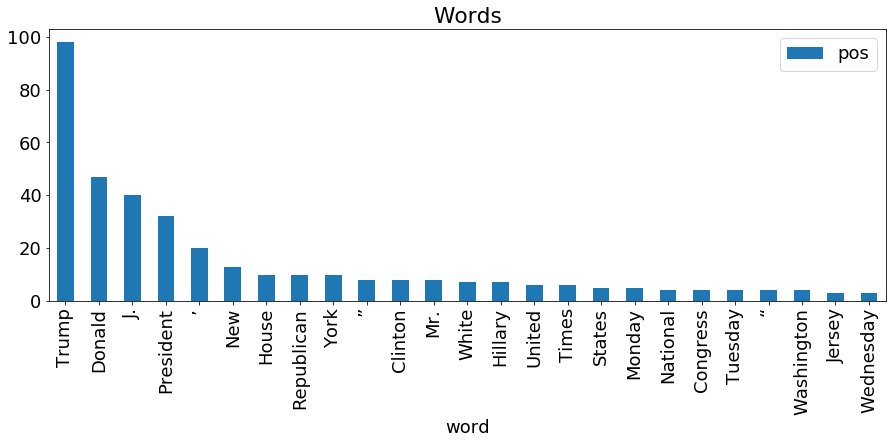

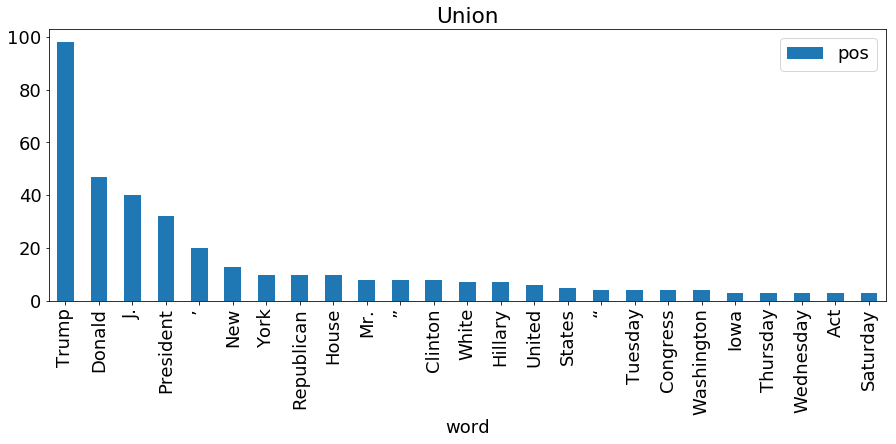

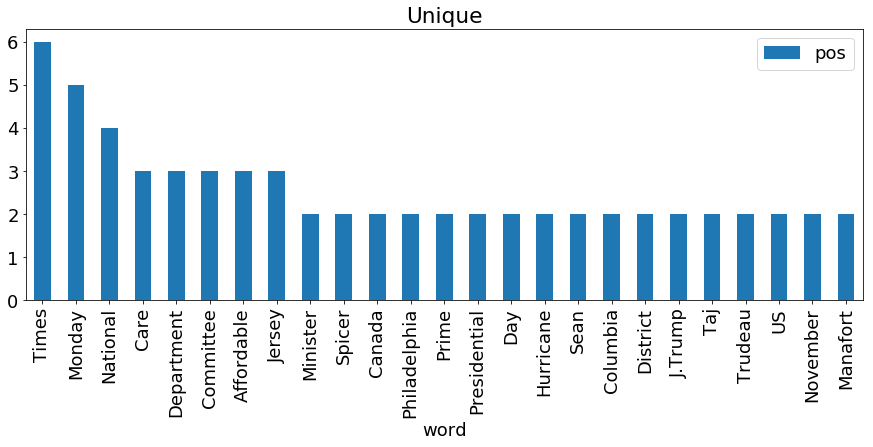

In [401]:
# Control testing

df_words = df_from_text(reader.snippets)
df_control = df_from_text(reader_control.snippets)

df_unique = df_words[~df_words['word'].isin(df_control['word'])]
df_union = df_words[df_words['word'].isin(df_control['word'])]

plot_top_words(df_words, "Words")
plot_top_words(df_union, "Union")
plot_top_words(df_unique, "Unique")

In [345]:
#df_words.groupby('pos').count().sort_values(by='word', ascending=False)[0:10].transpose()

In [346]:
#df_words.groupby('word').count().sort_values(by='pos', ascending=False)[0:10].transpose()